In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
from sklearn import linear_model

In [24]:
url = 'https://s3.amazonaws.com/codecademy-content/programs/data-science-path/linear_regression/honeyproduction.csv'
res = requests.get(url)
with open('honeyproduction.csv', 'wb') as file:
    file.write(res.content)

In [25]:
#df = pd.read_csv("https://s3.amazonaws.com/codecademy-content/programs/data-science-path/linear_regression/honeyproduction.csv")
df = pd.read_csv('honeyproduction.csv')

In [26]:
df.head()

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
0,AL,16000.0,71,1136000.0,159000.0,0.72,818000.0,1998
1,AZ,55000.0,60,3300000.0,1485000.0,0.64,2112000.0,1998
2,AR,53000.0,65,3445000.0,1688000.0,0.59,2033000.0,1998
3,CA,450000.0,83,37350000.0,12326000.0,0.62,23157000.0,1998
4,CO,27000.0,72,1944000.0,1594000.0,0.70,1361000.0,1998


In [27]:
prod_per_year = df.groupby('year')['totalprod'].mean()

In [28]:
prod_per_year

year
1998    5.105093e+06
1999    4.706674e+06
2000    5.106000e+06
2001    4.221545e+06
2002    3.892386e+06
2003    4.122091e+06
2004    4.456805e+06
2005    4.243146e+06
2006    3.761902e+06
2007    3.600512e+06
2008    3.974927e+06
2009    3.626700e+06
2010    4.382350e+06
2011    3.680025e+06
2012    3.522675e+06
Name: totalprod, dtype: float64

In [29]:
X = df['year'].unique()

In [30]:
X = X.reshape(-1,1)

In [31]:
y = prod_per_year.to_numpy()

Text(0, 0.5, 'Production')

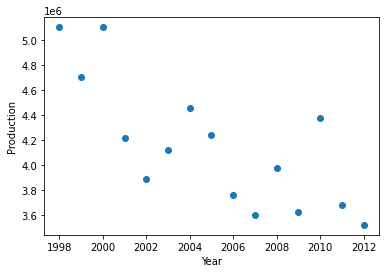

In [32]:
plt.scatter(X, y);
plt.xlabel('Year')
plt.ylabel('Production')

In [33]:
regr = linear_model.LinearRegression()

In [34]:
regr.fit(X, y)

LinearRegression()

In [35]:
print(regr.coef_, regr.intercept_)

[-88303.18915238] 181208083.10732976


In [36]:
y_pred = regr.predict(X)

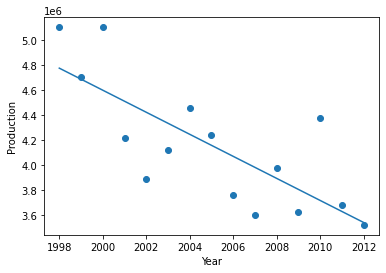

In [37]:
plt.scatter(X, y)
plt.plot(X, y_pred)
plt.xlabel('Year')
plt.ylabel('Production');

In [38]:
X_future = np.array(range(2013, 2051))

In [39]:
X_future = X_future.reshape(-1, 1)

In [40]:
#future_predict = regr.predict(X_future)
# there's no need to predict on X_future since it is the same slope and intercept as original predict
future_predict = regr.coef_ * X_future + regr.intercept_

In [41]:
ft = list(zip(X_future, future_predict))
ft_df = pd.DataFrame(ft, columns=['year', 'prod'])
ft_df.tail()

,year,prod
33,[2046],[539758.1015563309]
34,[2047],[451454.91240397096]
35,[2048],[363151.7232515812]
36,[2049],[274848.5340991914]
37,[2050],[186545.34494683146]


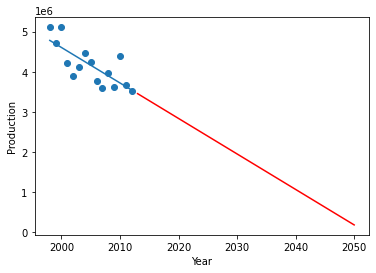

In [42]:
plt.scatter(X, y)
plt.plot(X, y_pred)
plt.plot(X_future, future_predict, color="r")
plt.xlabel('Year')
plt.ylabel('Production');